In [319]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [320]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [331]:
def deletCols(df, keep):
    remove = []
    for i in range(len(df.columns)):
        column = df.columns[i]
        if(column not in keep):
            remove.append(column)

    return df.drop(remove, axis=1)

def renameCols(df, suffix):
    for column in df.columns:
        df = df.rename(columns={column: f'{column}_{suffix}'})
    
    return df

def setCol(df, idx):
    df.columns = df.iloc[0]
    df = df.drop(df.index[0])

    return df

def dfStringToNum(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = 0
    return df

def dropNAN(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = np.nan
    return df
    

<h3>GHG For Every Country</h3>

In [322]:
#Transposing Data
ghg = pd.read_csv("Macro/GHG Energy.csv")
#reset column header to year
ghg.columns = ghg.iloc[2]
ghg = ghg.reset_index(drop=True)
ghg.columns.name = None
#move years (the current column header) to the index
ghg = ghg.transpose()
#set country names as column headers
ghg = setCol(ghg, 0)
#remove name
ghg.columns.name = None
#remove all columns with header name null
ghg = ghg.loc[:, ghg.columns.notnull()]

#Remove columns
col_keep = ["World"]
start = 0
end = 0

for i in range(len(ghg.columns)):
    column = ghg.columns[i]
    if column == "Canada":
        start = i
    if column == "Middle East":
        end = i

for i in range(start, end):
    col_keep.append(ghg.columns[i])

ghg = deletCols(ghg, col_keep)

ghg = renameCols(ghg, "ghg")

ghg.head()

,World_ghg,Canada_ghg,Chile_ghg,Mexico_ghg,United States_ghg,OECD Americas_ghg,Australia_ghg,Israel_ghg,Japan_ghg,Korea_ghg,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1971,16121,366,22,118,4581,5118,151,14,762,56,...,1,65,5,13,13,88,13,36,1,525
1972,16840,385,22,131,4825,5395,157,15,799,58,...,2,66,5,13,14,104,14,40,1,533
1973,17771,404,21,143,4987,5589,166,16,909,72,...,2,59,7,13,15,124,14,46,2,561
1974,17722,413,21,156,4823,5448,181,16,896,75,...,2,48,7,13,15,139,17,51,2,558
1975,17768,404,18,163,4631,5249,189,17,860,82,...,2,40,6,13,17,142,22,56,2,579


<h3>Investment: R&D per thousands of GDP</h3>

In [323]:
rd = pd.read_csv("Macro/R&D.csv")
rd = setCol(rd, 0)

for index, row in rd.iterrows():
    if(row["Indicator"].strip() != "RD&D per thousand units of GDP"):
        rd = rd.drop(index)

rd = rd.drop(columns="Indicator")
rd.columns.name = None
rd = rd.transpose()
rd = setCol(rd, 0)
rd.columns.name = None
rd = rd.drop(rd.index[-1])
pd.to_datetime(rd.index)
rd = renameCols(rd, "r&d")

rd.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Norway_r&d,Poland_r&d,Portugal_r&d,Slovak Republic_r&d,Spain_r&d,Sweden_r&d,Switzerland_r&d,Turkey_r&d,United Kingdom_r&d,United States_r&d
1974,..,..,1.262,..,0.854,..,..,..,..,..,...,0.154,..,..,..,0.311,0.227,0.043,..,1.033,0.523
1975,..,..,1.456,..,0.782,..,0.215,..,..,..,...,0.092,..,..,..,0.304,0.57,0.054,..,1.015,0.727
1976,..,..,1.329,..,0.778,..,0.223,..,..,..,...,0.093,..,..,..,0.305,0.498,0.068,..,1.022,0.811
1977,..,0.321,1.098,..,0.824,..,0.328,..,..,..,...,0.103,..,..,..,0.238,0.649,0.177,..,0.821,1.183
1978,..,0.398,0.84,..,1.023,..,0.41,..,..,..,...,0.649,..,..,..,0.292,0.784,0.368,..,0.961,1.302


In [350]:
df = rd.join(ghg)
df = df.set_index(pd.to_datetime(df.index, format='%Y'))
df = dfStringToNum(df)
df.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1974-01-01,0,0,1.262,0,0.854,0,0,0,0,0,...,2,48,7,13,15,139,17,51,2,558
1975-01-01,0,0,1.456,0,0.782,0,0.215,0,0,0,...,2,40,6,13,17,142,22,56,2,579
1976-01-01,0,0,1.329,0,0.778,0,0.223,0,0,0,...,3,41,5,15,16,176,24,66,2,650
1977-01-01,0,0.321,1.098,0,0.824,0,0.328,0,0,0,...,3,40,5,15,14,189,25,67,2,674
1978-01-01,0,0.398,0.84,0,1.023,0,0.41,0,0,0,...,3,45,6,4,16,190,23,57,2,667


In [351]:
def getRdGhgList(country):
    rd_list = df[f"{country}_r&d"].tolist()
    ghg_list = df[f"{country}_ghg"].tolist()
    year_list = df.index.tolist()
    
    return [rd_list, ghg_list, year_list]

def getRdGhgDf(country):
    df[f"{country}_r&d"] = df[f"{country}_r&d"].astype(float)
    df[f"{country}_ghg"] = df[f"{country}_ghg"].astype(float)
    return df[[f"{country}_r&d", f"{country}_ghg"]]


<AxesSubplot:xlabel='Canada_r&d', ylabel='Canada_ghg'>

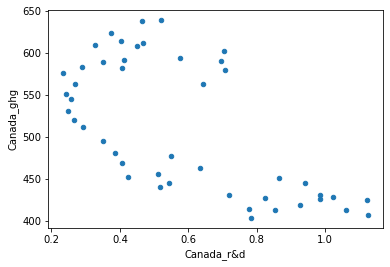

In [353]:
test = getRdGhgDf("Canada")
test.plot(kind="scatter", x="Canada_r&d", y="Canada_ghg")

In [347]:
test

,Canada_r&d,Canada_ghg
1974-01-01,0.854,413.0
1975-01-01,0.782,404.0
1976-01-01,0.778,415.0
1977-01-01,0.824,428.0
1978-01-01,1.023,429.0
1979-01-01,0.941,446.0
1980-01-01,0.865,452.0
1981-01-01,0.984,431.0
1982-01-01,1.061,414.0
1983-01-01,1.125,407.0


<AxesSubplot:>

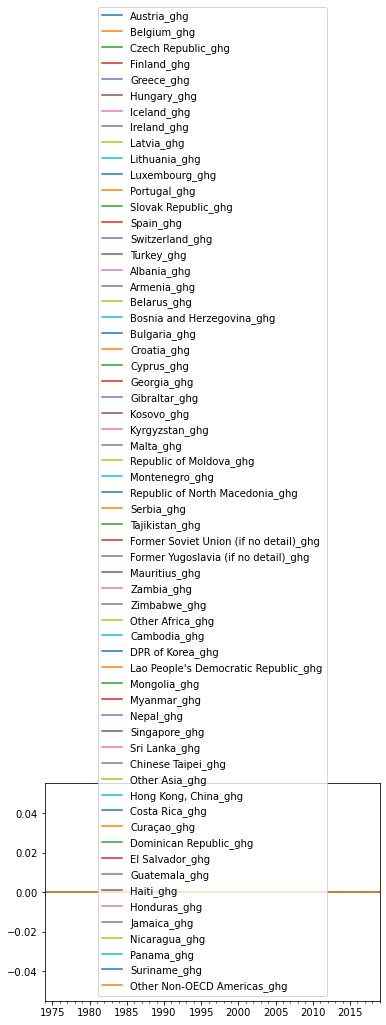

In [326]:
df.plot()

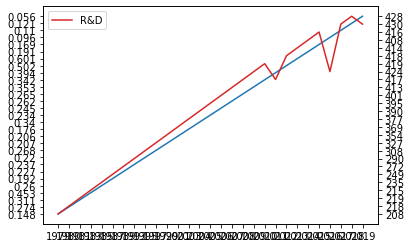

In [268]:
fig, ax1 = plt.subplots()

ax1.plot(year_list, rd_list)

ax2 = ax1.twinx()
ax2.plot(year_list, ghg_list, color='tab:red')

plt.legend(["R&D", "GHG"])

plt.show()
